In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Customer Churn.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
(df.describe()).round(2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
df["TotalCharges"].dtype

dtype('float64')

checking if unique id is duplicated

In [14]:
df["customerID"].duplicated().sum()

np.int64(0)

converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [15]:
def conv(value):
    if value == 1:
        return "yes"
    else : return "no"

In [17]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [18]:
df["SeniorCitizen"]

0        no
1        no
2        no
3        no
4        no
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: SeniorCitizen, Length: 7043, dtype: object

In [29]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

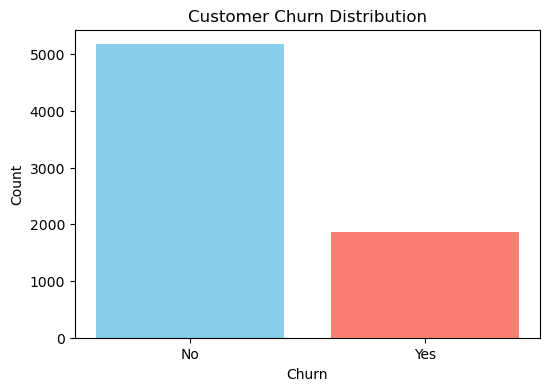

In [34]:
churn_counts = df["Churn"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

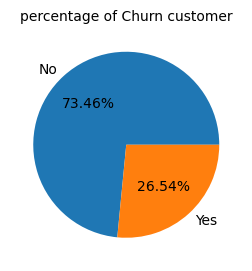

In [36]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({"Churn": "count"})
plt.pie(gb["Churn"],labels = gb.index,autopct = "%1.2f%%")
plt.title("percentage of Churn customer",fontsize = 10)
plt.show()

From the given pie chart we can see that 26.54 % of our customers has churned out

## Exploration of reasons behind churned out customers

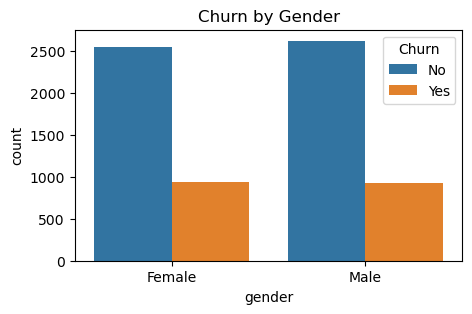

In [47]:
plt.figure(figsize = (5,3))
sns.countplot(x = "gender",data = df,hue = "Churn")
plt.title("Churn by Gender")
plt.show()

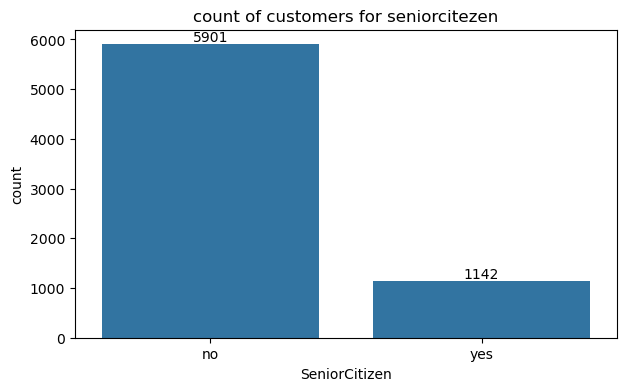

In [56]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customers for seniorcitezen")
plt.show()

comparative a greater pecentage of people in senior citizen category have churned

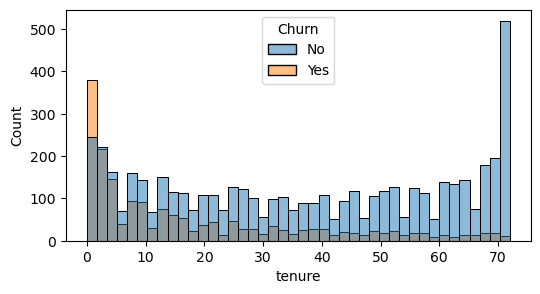

In [58]:
plt.figure(figsize = (6,3))
sns.histplot(data = df,x = "tenure",hue = "Churn",bins = 42)
plt.show()

from the above graph we can see that people who has used our services for a long time have stayed than the  people who has services for short term

Text(0.5, 1.0, 'count of customer by contract')

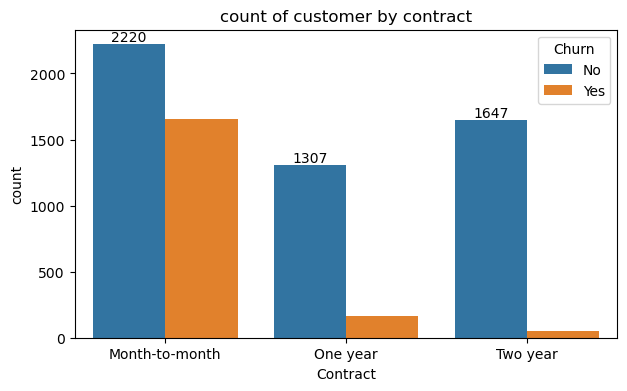

In [63]:
plt.figure(figsize = (7,4))
ax = sns.countplot(data = df,x = "Contract",hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customer by contract")


From the above graph we can see that people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

In [66]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

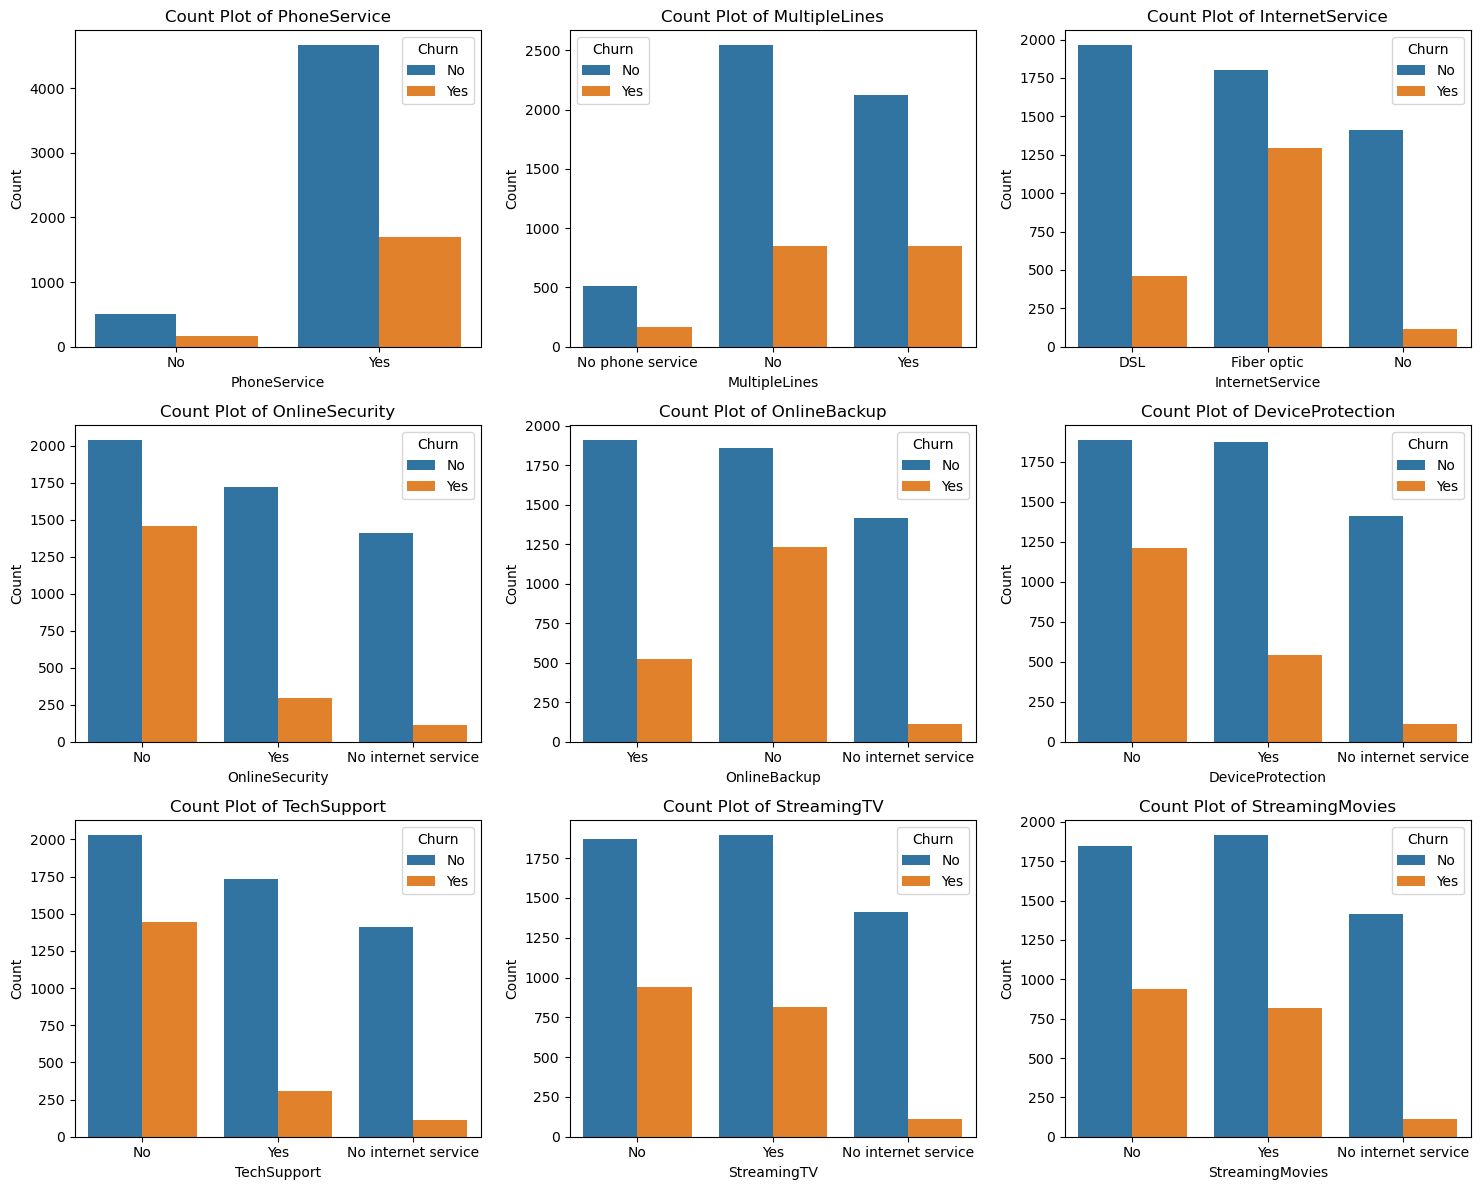

In [95]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

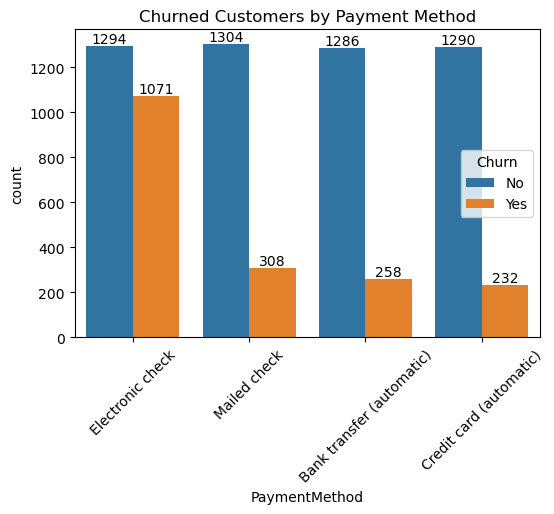

In [99]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

customer is likely to churn when he is using electronic check as a payment method